In [27]:
import scanpy as sc
import pandas as pd
import numpy as np

In [28]:
pwd

'/ictstr01/groups/ml01/workspace/shrey.parikh/PDAC_Work_Dir/PDAC_Final/Downstream'

In [29]:
sc.set_figure_params(dpi=100)
pd.set_option('display.max_columns', None)

In [3]:
steele_atlas = sc.read_h5ad('../../Steele_Atlas_counts.h5ad')

In [4]:
subset = sc.pp.subsample(steele_atlas, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X

print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")

# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0.0, Max: 14537.0, Mean: 0.11886571915387929
All values are integers: True


In [5]:
steele_atlas

AnnData object with n_obs × n_vars = 726107 × 36601
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'Count', 'Study..Citation..PMID.', 'GSE.SRA..Study.', 'Name', 'If.metastatic..location', 'Clusters', 'Treatment', 'DiseaseState', 'TreatmentType'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

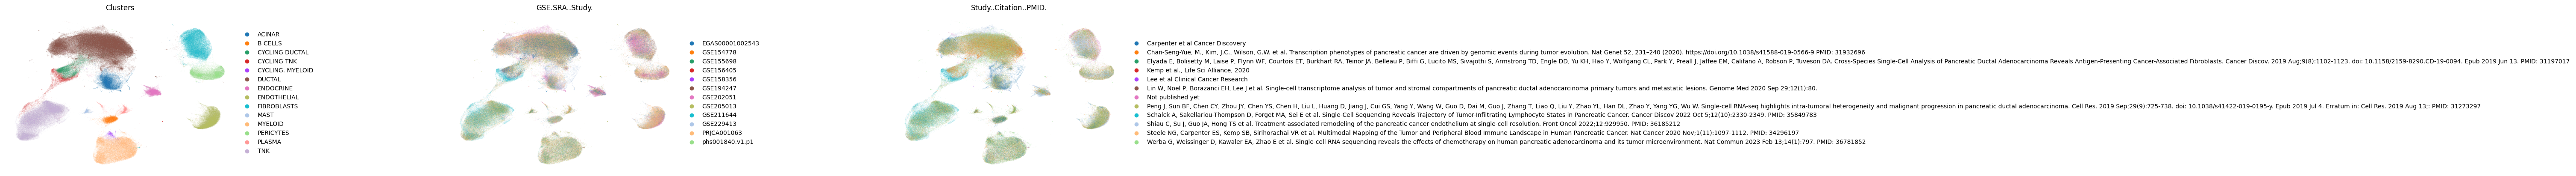

In [6]:
sc.pl.umap(steele_atlas, color=['Clusters', 'GSE.SRA..Study.', 'Study..Citation..PMID.'], frameon=False, wspace=0.75)

In [7]:
steele_atlas.obs = steele_atlas.obs.astype(str)

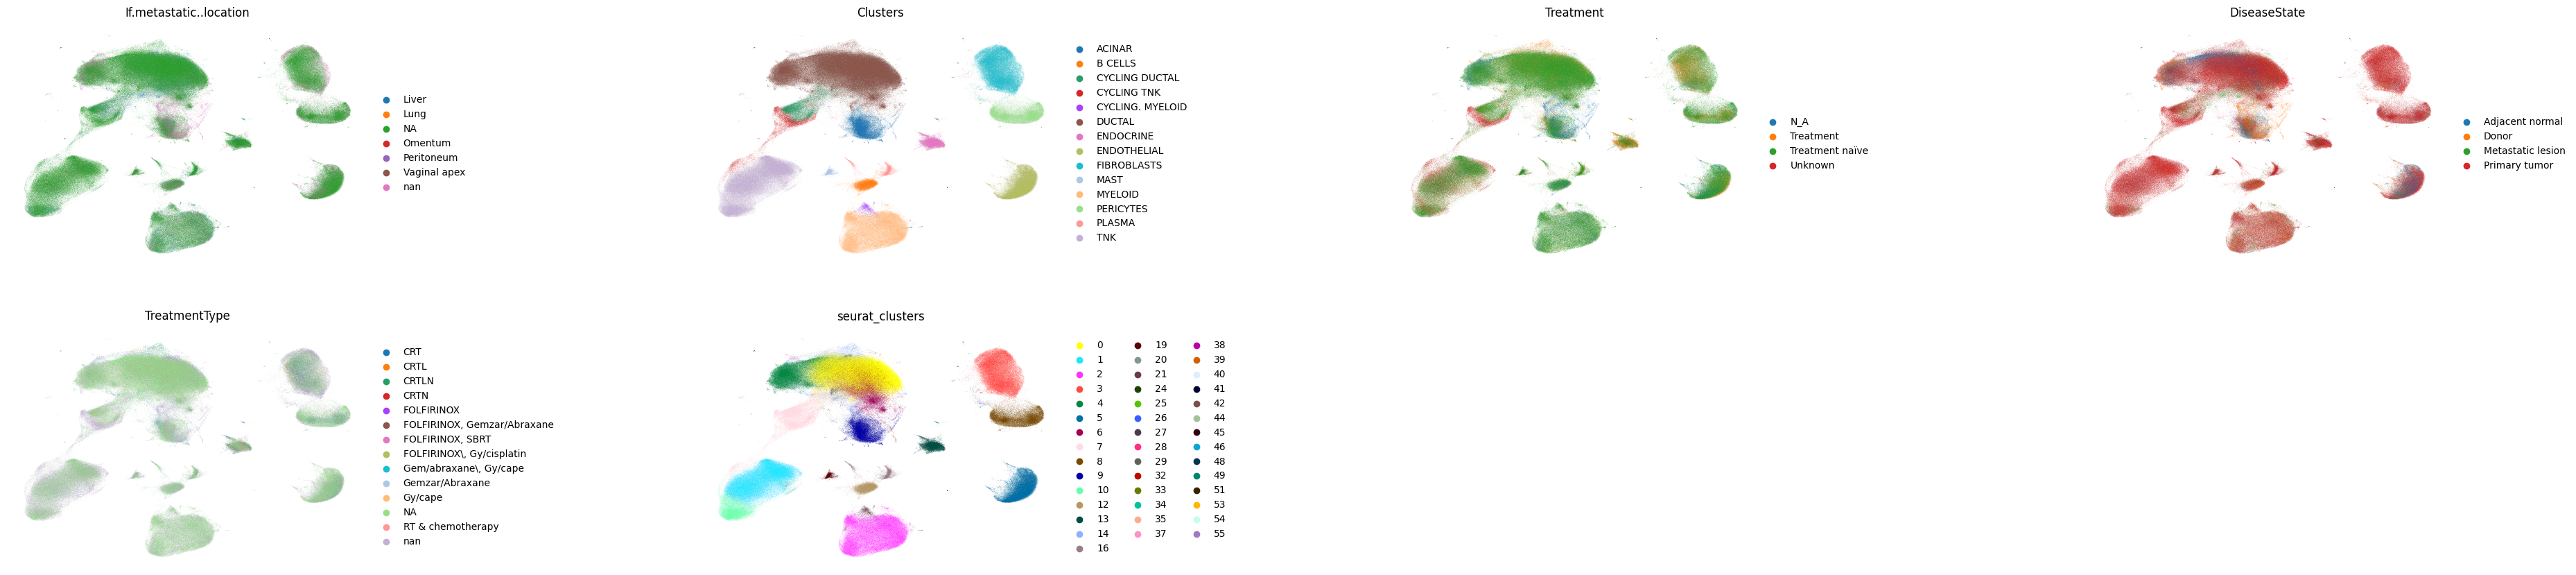

In [8]:
sc.pl.umap(steele_atlas, color=['If.metastatic..location', 'Clusters', 'Treatment', 'DiseaseState', 'TreatmentType', 'seurat_clusters'], frameon=False, wspace=0.75)

In [9]:
steele_atlas.obs.groupby(['If.metastatic..location', 'DiseaseState']).size().unstack()

/tmp/ipykernel_1877027/1858164979.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  steele_atlas.obs.groupby(['If.metastatic..location', 'DiseaseState']).size().unstack()


DiseaseState,Adjacent normal,Donor,Metastatic lesion,Primary tumor
If.metastatic..location,,,,
Liver,0,0,53145,0
Lung,0,0,1225,0
NA,74035,0,0,532699
Omentum,0,0,138,0
Peritoneum,0,0,459,0
Vaginal apex,0,0,1475,0
nan,0,33309,0,29622


In [10]:
steele_atlas.obs.rename(columns={'GSE.SRA..Study.': 'Dataset', 'Name': 'Donor_ID', 'DiseaseState':'Condition', 'If.metastatic..location': 'Location'}, inplace=True)

In [11]:
needed = ['EGAS00001002543', 'GSE158356', 'GSE194247', 'GSE211644', 'GSE229413', 'phs001840.v1.p1']

In [45]:
# steele_atlas.obs.drop('nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters'

In [13]:
steele_atlas.obs.groupby('Dataset').size()

/tmp/ipykernel_1877027/3148743956.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  steele_atlas.obs.groupby('Dataset').size()


Dataset
EGAS00001002543     76094
GSE154778           20364
GSE155698           23991
GSE156405           17809
GSE158356            2746
GSE194247           29622
GSE202051          147643
GSE205013          167366
GSE211644           40971
GSE229413           33309
PRJCA001063        147907
phs001840.v1.p1     18285
dtype: int64

In [14]:
steele_atlas_needed = steele_atlas[steele_atlas.obs['Dataset'].isin(needed)]

In [15]:
steele_atlas_needed.shape

(201027, 36601)

In [17]:
steele_atlas_needed.obs.groupby(['Dataset', 'Condition']).size().unstack()

/tmp/ipykernel_1877027/1229053749.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  steele_atlas_needed.obs.groupby(['Dataset', 'Condition']).size().unstack()


Condition,Adjacent normal,Donor,Metastatic lesion,Primary tumor
Dataset,,,,
EGAS00001002543,0,0,0,76094
GSE158356,0,0,2746,0
GSE194247,0,0,0,29622
GSE211644,0,0,0,40971
GSE229413,0,33309,0,0
phs001840.v1.p1,4181,0,0,14104


In [19]:
steele_atlas_needed.obs.groupby(['Dataset', 'Clusters']).size().unstack()

/tmp/ipykernel_1877027/2422205071.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  steele_atlas_needed.obs.groupby(['Dataset', 'Clusters']).size().unstack()


Clusters,ACINAR,B CELLS,CYCLING DUCTAL,CYCLING TNK,CYCLING. MYELOID,DUCTAL,ENDOCRINE,ENDOTHELIAL,FIBROBLASTS,MAST,MYELOID,PERICYTES,PLASMA,TNK
Dataset,,,,,,,,,,,,,,
EGAS00001002543,1403,1520,4385,63,144,47945,1642,2852,5354,418,3671,2648,336,3713
GSE158356,67,77,66,21,2,555,98,38,108,13,1341,100,63,197
GSE194247,306,20,661,0,3,11280,164,2722,11567,15,31,2689,4,160
GSE211644,305,35,57,11818,279,604,238,41,1,32,289,25,69,27178
GSE229413,8979,1459,114,48,163,9223,336,3425,1551,144,4931,979,28,1929
phs001840.v1.p1,215,1949,17,48,66,1163,47,82,648,68,7359,356,279,5988


In [20]:
import os
os.chdir('Extension')

In [21]:
for dataset in needed:
    dataset_name = dataset.replace('.','_') + '.h5ad'
    print(f'Saving: {dataset_name}')
    adata_temp = steele_atlas[steele_atlas.obs['Dataset'] == dataset].copy()
    adata_temp.write(dataset_name)
    print('_'*50)

Saving: EGAS00001002543.h5ad
__________________________________________________
Saving: GSE158356.h5ad
__________________________________________________
Saving: GSE194247.h5ad
__________________________________________________
Saving: GSE211644.h5ad
__________________________________________________
Saving: GSE229413.h5ad
__________________________________________________
Saving: phs001840_v1_p1.h5ad
__________________________________________________


# Load Other Datasets

In [ ]:
adata = sc.read_h5ad('../../Binned_Data/adata_scpoli_final_all_genes.h5ad')

In [62]:
adata

AnnData object with n_obs × n_vars = 827318 × 39024
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'Level_1', 'Level_1_refined', 'MALAT1_lognorm', 'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age', 'Sex', 'Diabetes', 'Treatment'
    var: 'n_cells', 'ensembl_id', 'start', 'end', 'chromosome', 'gene_name_adata_sc', 'highly_variable_adata_sc', 'means_adata_sc', 'dispersions_adata_sc', 'dispersions_norm_adata_sc', 'highly_variable_nbatches_adata_sc', 'highly_variable_intersect

In [69]:
adata.obs.groupby('Dataset').size()

/tmp/ipykernel_2528150/316840971.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('Dataset').size()


Dataset
Caronni             71985
Ding               146983
Ding_snRNA-seq      58888
Lee                  8136
Lin                 14895
Peng                41411
Peng_Normal         14668
Hwang              186330
Schlesinger          5387
Simeone            200471
Steele              35928
Steele_Adj_Norm      6331
Zhang               35905
dtype: int64

# Zhang

In [ ]:
zhang = adata[adata.obs.Dataset.str.contains('Zhang')]

In [70]:
zhang.obs.ID_batch_covariate.unique().tolist()

['GSM5910789_Case3-YF_PDAC_Zhang_scRNA-seq',
 'GSM5910787_Case2-YF_PDAC_Zhang_scRNA-seq',
 'GSM5910784_Case1-YF_PDAC_Zhang_scRNA-seq']

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_utils.py:491: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


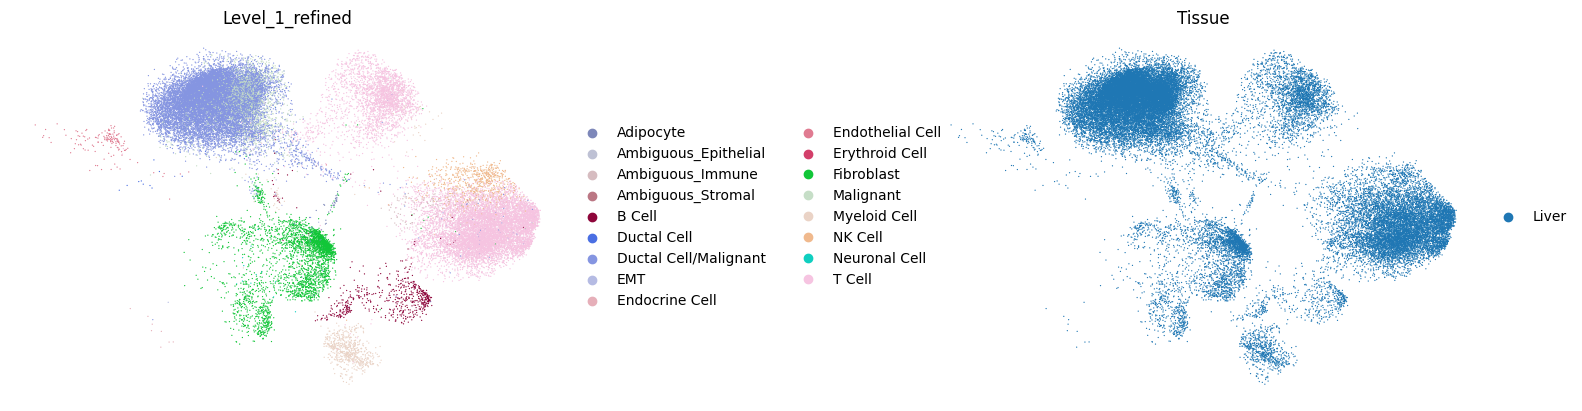

In [65]:
sc.pl.umap(zhang, color=['Level_1_refined', 'Tissue'], frameon=False, wspace=0.5)

## zhang all donors

In [71]:
zhang_all = sc.read_h5ad('/lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Zhang/Zhang_concat.h5ad')

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [72]:
zhang_loc = {'GSM5910784_Case1-YF_PDAC': 'Tumour', 
'GSM5910788_Case2-ZY_LM': 'Liver Metastatses',
'GSM5910785_Case1-ZY_LM':'Liver Metastatses', 
'GSM5910790_Case3-ZY_LM':'Liver Metastatses', 
'GSM5910789_Case3-YF_PDAC': 'Tumour', 
'GSM5910786_Case2-ZC_NPT': 'Adjacent Normal', 
'GSM5910791_Case4-ZY_LM': 'Liver Metastatses', 
'GSM5910787_Case2-YF_PDAC': 'Tumour', 
'GSM5910784_Case1-YF_PDAC': 'Tumour'}
zhang_all.obs['Location'] = zhang_all.obs.ID.map(zhang_loc)

In [199]:
zhang_all.obs.groupby('ID').size()

ID
GSM5910784_Case1-YF_PDAC    19139
GSM5910785_Case1-ZY_LM      12030
GSM5910786_Case2-ZC_NPT      5924
GSM5910787_Case2-YF_PDAC    10556
GSM5910788_Case2-ZY_LM       7778
GSM5910789_Case3-YF_PDAC     8239
GSM5910790_Case3-ZY_LM       7663
GSM5910791_Case4-ZY_LM       1206
dtype: int64

In [73]:
subset = sc.pp.subsample(zhang_all, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X

print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")

# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0, Max: 3554, Mean: 0.3732607789109598
All values are integers: True


In [74]:
zhang_all.obs.head()

,n_counts,log_counts,n_genes,mt_frac,ID,Dataset,Location
barcode,,,,,,,
AAACCCAAGTCTGTAC-1,3246,8.085179,1189,0.0,GSM5910788_Case2-ZY_LM,Zhang,Liver Metastatses
AAACCCACAACAAAGT-1,3015,8.011355,1056,0.0,GSM5910788_Case2-ZY_LM,Zhang,Liver Metastatses
AAACCCACAATAACCC-1,1061,6.966967,588,0.0,GSM5910788_Case2-ZY_LM,Zhang,Liver Metastatses
AAACCCACACTCCGGA-1,2438,7.798933,798,0.0,GSM5910788_Case2-ZY_LM,Zhang,Liver Metastatses
AAACCCAGTCGTACTA-1,828,6.719013,415,0.0,GSM5910788_Case2-ZY_LM,Zhang,Liver Metastatses


In [75]:
zhang_all.write('Zhang_GSE197177.h5ad')

In [76]:
zhang_all.shape

(72535, 21913)

# Lin MET

In [77]:
lin_metastasis = adata[adata.obs.Dataset.str.contains('Lin')]

In [79]:
lin_metastasis.obs.groupby('Tissue').size()

/tmp/ipykernel_2528150/4203594212.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lin_metastasis.obs.groupby('Tissue').size()


Tissue
Liver       6876
Pancreas    8019
dtype: int64

In [80]:
lin_metastasis = lin_metastasis[lin_metastasis.obs.Tissue == 'Liver']

In [81]:
lin_metastasis.shape

(6876, 39024)

In [85]:
lin_metastasis.obs.Unique_ID.unique()

['GSM4679546', 'GSM4679547', 'GSM4679545', 'GSM4679544', 'GSM4679542', 'GSM4679543']
Categories (6, object): ['GSM4679542', 'GSM4679543', 'GSM4679544', 'GSM4679545', 'GSM4679546', 'GSM4679547']

In [86]:
lin_metastasis.write('Lin_MET_GSE154778.h5ad')

# Simeone MET

In [87]:
simeone_metastasis = adata[adata.obs.Dataset.str.contains('Simeon')]

In [89]:
simeone_metastasis.obs.groupby('Tissue').size()

/tmp/ipykernel_2528150/3853230344.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  simeone_metastasis.obs.groupby('Tissue').size()


Tissue
Liver        58483
Pancreas    141988
dtype: int64

In [90]:
simeone_metastasis = simeone_metastasis[simeone_metastasis.obs.Tissue == 'Liver']

In [92]:
simeone_metastasis.shape

(58483, 39024)

In [93]:
simeone_metastasis.write('Simeone_MET_GSE205013.h5ad')

In [96]:
simeone_metastasis.shape[0] + lin_metastasis.shape[0] + zhang_all.shape[0] + steele_atlas_needed.shape[0] 
print(simeone_metastasis.shape[0] + lin_metastasis.shape[0] + zhang_all.shape[0] + steele_atlas_needed.shape[0] + 726054)

1064975


In [97]:
subset = sc.pp.subsample(steele_atlas_needed, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X

print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")

# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0.0, Max: 8.847370801858284, Mean: 0.06241950651591169
All values are integers: False


In [5]:
pwd

'/ictstr01/groups/ml01/workspace/shrey.parikh/PDAC_Work_Dir/PDAC_Final/Downstream'

In [6]:
simeone_metastasis = sc.read_h5ad('Extension/Simeone_MET_GSE205013.h5ad')

In [7]:
simeone_metastasis.obs.head()

,Barcode,Dataset,ID_batch_covariate,Unique_ID,Technology,n_genes,n_counts,log_counts,mt_frac,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mito,log1p_total_counts_mito,pct_counts_mito,leiden,batch,leiden_0.2,leiden_0.2_annotation,leiden_subcluster,level0_leiden_subcluster,leiden_0.5,is_outlier_total_counts,outlier,infercnv_score_malignant,infercnv_score_malignant_refined,cnv_score_abs,treatment_status,Level_0,Level_1,Level_1_refined,MALAT1_lognorm,empty_droplet,ID_harmonised,Dataset_unique,Tissue,Age,Sex,Diabetes,Treatment
Dataset_Barcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Simeone_AAACCCAAGGAGATAG-1-0,AAACCCAAGGAGATAG-1,Simeone,P17_Simeone_scRNA-seq,GSM6204125_P17,scRNA-seq,2531,11439.0,9.344784,0.011627,2531,7.836765,11429.0,9.343997,133.0,4.897840,1.163706,1,0,1,Immune,Unknown,Epithelial/Malignant Cell_1,4,False,0,Non-Malignant,Non-Malignant,0.006379,NaN,Epithelial/Malignant Cell,Ductal Cell/Malignant,Ductal Cell/Malignant,5.124670,False,P17,Simeone,Liver,60s,Male,Unknown,FOLFIRINOX
Simeone_AAACCCAAGTTGCGAG-1-0,AAACCCAAGTTGCGAG-1,Simeone,P17_Simeone_scRNA-seq,GSM6204125_P17,scRNA-seq,3208,12015.0,9.393911,0.035539,3208,8.073715,12008.0,9.393412,427.0,6.059123,3.555963,3,0,2,Epithelial,Unknown,Immune Cell_1,3,False,0,Non-Malignant,Non-Malignant,0.012420,NaN,Immune Cell,T Cell,T Cell,4.519316,False,P17,Simeone,Liver,60s,Male,Unknown,FOLFIRINOX
Simeone_AAACCCACACGATAGG-1-0,AAACCCACACGATAGG-1,Simeone,P17_Simeone_scRNA-seq,GSM6204125_P17,scRNA-seq,4702,17998.0,9.798016,0.057840,4702,8.455956,17992.0,9.797738,1041.0,6.948897,5.785905,1,0,1,Immune,Unknown,Epithelial/Malignant Cell_1,4,False,0,Malignant,Malignant,0.055160,NaN,Epithelial/Malignant Cell,Ductal Cell/Malignant,Malignant,5.510281,False,P17,Simeone,Liver,60s,Male,Unknown,FOLFIRINOX
Simeone_AAACCCACACGTTCGG-1-0,AAACCCACACGTTCGG-1,Simeone,P17_Simeone_scRNA-seq,GSM6204125_P17,scRNA-seq,1065,2221.0,7.705713,0.049077,1065,6.971669,2217.0,7.704361,109.0,4.700480,4.916554,11,0,0,Stromal,Unknown,Immune Cell_2,12,False,0,Non-Malignant,Non-Malignant,0.004664,NaN,Immune Cell,NK Cell,NK Cell,6.744051,False,P17,Simeone,Liver,60s,Male,Unknown,FOLFIRINOX
Simeone_AAACCCAGTCGCATGC-1-0,AAACCCAGTCGCATGC-1,Simeone,P17_Simeone_scRNA-seq,GSM6204125_P17,scRNA-seq,4547,24846.0,10.120452,0.037551,4547,8.422443,24835.0,10.120049,933.0,6.839476,3.756795,1,0,1,Immune,Unknown,Epithelial/Malignant Cell_1,4,False,0,Malignant,Malignant,0.055160,NaN,Epithelial/Malignant Cell,Ductal Cell/Malignant,Malignant,4.914806,False,P17,Simeone,Liver,60s,Male,Unknown,FOLFIRINOX


# Lee MET

In [12]:
lee_all = sc.read_h5ad('/lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Lee/Lee_concat.h5ad')

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [30]:
lee_all_met = lee_all[lee_all.obs.ID.isin(['LiM_filtered_feature_bc_matrix',  'VM_filtered_feature_bc_matrix', 'LuM_filtered_feature_bc_matrix'])]

In [31]:
lee_all_met.obs.groupby('ID').size()

/tmp/ipykernel_2538773/3645665652.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lee_all_met.obs.groupby('ID').size()


ID
LiM_filtered_feature_bc_matrix    10013
LuM_filtered_feature_bc_matrix     2899
VM_filtered_feature_bc_matrix      1527
dtype: int64

In [32]:
subset = sc.pp.subsample(lee_all_met, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X

print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")

# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0, Max: 1795, Mean: 0.38597866095385114
All values are integers: True


In [33]:
lee_all_met.obs['Location'] = lee_all_met.obs.ID.map({'LiM_filtered_feature_bc_matrix': 'Liver',  
                                                      'VM_filtered_feature_bc_matrix': 'Vaginal Apex', 
                                                      'LuM_filtered_feature_bc_matrix': 'Lung'})

/tmp/ipykernel_2538773/1425428342.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  lee_all_met.obs['Location'] = lee_all_met.obs.ID.map({'LiM_filtered_feature_bc_matrix': 'Liver',
/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [35]:
lee_all_met.obs.groupby(['Location']).size()

/tmp/ipykernel_2538773/438034551.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lee_all_met.obs.groupby(['Location']).size()


Location
Liver           10013
Lung             2899
Vaginal Apex     1527
dtype: int64

In [36]:
lee_all_met.write('Extension/Lee_MET_GSE156405.h5ad')

# Reload all datasets and concat

In [38]:
import os
os.chdir('Extension')

In [41]:
for file in os.listdir():
    print(file.split('.')[0])

Extension_Datasets_Combined
GSE211644
Simeone_MET_GSE205013
GSE158356
GSE194247
GSE212966
GSE229413
Lee_MET_GSE156405
Zhang_GSE197177
Lin_MET_GSE154778

phs001840_v1_p1
EGAS00001002543


In [43]:
adatas ={}
for file in os.listdir():
    if 'Extension_Datasets_Combined' in file:
        continue
    print(f'Loading: {file}')
    if 'h5ad' in file:
        adatas[file] = sc.read_h5ad(file)
        adatas[file].obs['Dataset'] = file.split('.')[0]

Loading: GSE211644.h5ad
Loading: Simeone_MET_GSE205013.h5ad
Loading: GSE158356.h5ad
Loading: GSE194247.h5ad
Loading: GSE212966
Loading: GSE229413.h5ad
Loading: Lee_MET_GSE156405.h5ad


/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Loading: Zhang_GSE197177.h5ad


/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Loading: Lin_MET_GSE154778.h5ad
Loading: phs001840_v1_p1.h5ad
Loading: EGAS00001002543.h5ad


In [44]:
for key,adata in adatas.items():
    print('-'*50)
    print(f'Columns in {key}: {adata.obs.columns}')
    print('-'*50)

--------------------------------------------------
Columns in GSE211644.h5ad: Index(['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'Count',
       'Study..Citation..PMID.', 'Dataset', 'Donor_ID', 'Location', 'Clusters',
       'Treatment', 'Condition', 'TreatmentType'],
      dtype='object')
--------------------------------------------------
--------------------------------------------------
Columns in Simeone_MET_GSE205013.h5ad: Index(['Barcode', 'Dataset', 'ID_batch_covariate', 'Unique_ID', 'Technology',
       'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito',
       'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation',
       'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5',
       'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant',
       'infercnv_score_malignant_refined'

In [45]:
adata_combined = sc.concat(adatas.values(), label='batch', keys=adatas.keys(), join='outer')

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [46]:
adata_combined

AnnData object with n_obs × n_vars = 353360 × 44292
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'Count', 'Study..Citation..PMID.', 'Dataset', 'Donor_ID', 'Location', 'Clusters', 'Treatment', 'Condition', 'TreatmentType', 'Barcode', 'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'Level_1', 'Level_1_refined', 'MALAT1_lognorm', 'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age', 'Sex', 'Diabetes', 'ID'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 

In [47]:
adata_combined.obs.Location = adata_combined.obs.Location.replace('Liver Metastatses', 'Liver')

/tmp/ipykernel_2538773/1776316749.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_combined.obs.Location = adata_combined.obs.Location.replace('Liver Metastatses', 'Liver')


In [48]:
adata_combined.obs.Location = adata_combined.obs.Location.replace('nan', 'NA')

/tmp/ipykernel_2538773/251772292.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_combined.obs.Location = adata_combined.obs.Location.replace('nan', 'NA')


In [49]:
adata_combined.obs.groupby(['Dataset', 'Location']).size().unstack()

/tmp/ipykernel_2538773/3810818464.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_combined.obs.groupby(['Dataset', 'Location']).size().unstack()


Location,Adjacent Normal,Liver,Lung,NA,Omentum,Tumour,Vaginal Apex
Dataset,,,,,,,
EGAS00001002543,0,0,0,76094,0,0,0
GSE158356,0,2608,0,0,138,0,0
GSE194247,0,0,0,29622,0,0,0
GSE211644,0,0,0,40971,0,0,0
GSE229413,0,0,0,33309,0,0,0
Lee_MET_GSE156405,0,10013,2899,0,0,0,1527
Lin_MET_GSE154778,0,0,0,0,0,0,0
Simeone_MET_GSE205013,0,0,0,0,0,0,0
Zhang_GSE197177,5924,28677,0,0,0,37934,0


In [50]:
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Adjacent normal', 'Healthy')

/tmp/ipykernel_2538773/2629670990.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Adjacent normal', 'Healthy')


In [51]:
adata_combined.obs.groupby(['Dataset', 'Condition']).size().unstack()

/tmp/ipykernel_2538773/943054544.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_combined.obs.groupby(['Dataset', 'Condition']).size().unstack()


Condition,Healthy,Donor,Metastatic lesion,Primary tumor
Dataset,,,,
EGAS00001002543,0,0,0,76094
GSE158356,0,0,2746,0
GSE194247,0,0,0,29622
GSE211644,0,0,0,40971
GSE229413,0,33309,0,0
Lee_MET_GSE156405,0,0,0,0
Lin_MET_GSE154778,0,0,0,0
Simeone_MET_GSE205013,0,0,0,0
Zhang_GSE197177,0,0,0,0


In [ ]:
# location: pancreas,

# Fix  GSE229413

In [52]:
mask = adata_combined.obs.Dataset == 'GSE229413' #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Condition'] = 'Healthy'

In [53]:
adata_combined.obs.Condition = adata_combined.obs.Condition.astype(str)

# Fix  Lin, Simeone

In [54]:
mask = adata_combined.obs.Dataset.str.contains('Lin') #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Condition'] = 'Metastatic Lesion'
mask = adata_combined.obs.Dataset.str.contains('Simeone') #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Condition'] = 'Metastatic Lesion'
mask = adata_combined.obs.Dataset.str.contains('Lee') #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Condition'] = 'Metastatic Lesion'

In [58]:
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Metastatic lesion', 'Metastatic Lesion')

In [59]:
adata_combined.obs.groupby(['Dataset', 'Condition']).size().unstack()

Condition,Healthy,Metastatic Lesion,Primary tumor,nan
Dataset,,,,
EGAS00001002543,NaN,NaN,76094.0,NaN
GSE158356,NaN,2746.0,NaN,NaN
GSE194247,NaN,NaN,29622.0,NaN
GSE211644,NaN,NaN,40971.0,NaN
GSE229413,33309.0,NaN,NaN,NaN
Lee_MET_GSE156405,NaN,14439.0,NaN,NaN
Lin_MET_GSE154778,NaN,6876.0,NaN,NaN
Simeone_MET_GSE205013,NaN,58483.0,NaN,NaN
Zhang_GSE197177,NaN,NaN,NaN,72535.0


In [60]:
mask = adata_combined.obs.Dataset.str.contains('Zhang') #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Condition'] = adata_combined.obs.loc[mask, 'Location']

In [61]:
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Tumour', 'Primary Tumor')
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Liver Metastatses', 'Metastatic Lesion')
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Adjacent Normal', 'Healhty')

In [63]:
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Healhty', 'Healthy')
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Primary tumor', 'Primary Tumor')

In [65]:
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Liver', 'Metastatic Lesion')

In [66]:
adata_combined.obs.groupby(['Dataset', 'Condition']).size().unstack()

Condition,Healthy,Metastatic Lesion,Primary Tumor
Dataset,,,
EGAS00001002543,NaN,NaN,76094.0
GSE158356,NaN,2746.0,NaN
GSE194247,NaN,NaN,29622.0
GSE211644,NaN,NaN,40971.0
GSE229413,33309.0,NaN,NaN
Lee_MET_GSE156405,NaN,14439.0,NaN
Lin_MET_GSE154778,NaN,6876.0,NaN
Simeone_MET_GSE205013,NaN,58483.0,NaN
Zhang_GSE197177,5924.0,28677.0,37934.0


In [67]:
adata_combined.obs.groupby(['Condition']).size()

Condition
Healthy               43414
Metastatic Lesion    111221
Primary Tumor        198725
dtype: int64

In [69]:
adata_combined.obs = adata_combined.obs.astype(str)

In [70]:
adata_combined.obs.replace("nan", np.nan, inplace=True)

/tmp/ipykernel_2538773/4178607326.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adata_combined.obs.replace("nan", np.nan, inplace=True)


In [71]:
adata_combined.obs['Atlas_Extension_CellType'] = adata_combined.obs['Level_1_refined'].fillna(adata_combined.obs['Clusters'])

In [72]:
adata_combined.obs.columns

Index(['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'Count',
       'Study..Citation..PMID.', 'Dataset', 'Donor_ID', 'Location', 'Clusters',
       'Treatment', 'Condition', 'TreatmentType', 'Barcode',
       'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts',
       'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'total_counts_mito',
       'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch',
       'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster',
       'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts',
       'outlier', 'infercnv_score_malignant',
       'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status',
       'Level_0', 'Level_1', 'Level_1_refined', 'MALAT1_lognorm',
       'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age',
       'Sex', 'Diabetes', 'ID', 'Atlas_Extension_CellType'],
      dtype

In [73]:
adata_combined.obs.drop(['Level_1', 'Level_1_refined', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'Count',
       'Study..Citation..PMID.','Clusters','n_genes', 'n_counts',
       'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'total_counts_mito',
       'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch',
       'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster',
       'level0_leiden_subcluster', 'leiden_0.5','Level_0'], inplace=True, axis=1)

In [74]:
adata_combined.obs.head()

,Dataset,Donor_ID,Location,Treatment,Condition,TreatmentType,Barcode,ID_batch_covariate,Unique_ID,Technology,is_outlier_total_counts,outlier,infercnv_score_malignant,infercnv_score_malignant_refined,cnv_score_abs,treatment_status,MALAT1_lognorm,empty_droplet,ID_harmonised,Dataset_unique,Tissue,Age,Sex,Diabetes,ID,Atlas_Extension_CellType
AAACCTGAGCTCCTTC-1_135,GSE211644,SRR18025515,NA,Treatment naïve,Primary Tumor,NA,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TNK
AAACGGGGTGCCTGCA-1_135,GSE211644,SRR18025515,NA,Treatment naïve,Primary Tumor,NA,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TNK
AAAGATGGTGAAATCA-1_135,GSE211644,SRR18025515,NA,Treatment naïve,Primary Tumor,NA,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TNK
AAAGATGTCCACGTGG-1_135,GSE211644,SRR18025515,NA,Treatment naïve,Primary Tumor,NA,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TNK
AAAGCAAAGAATAGGG-1_135,GSE211644,SRR18025515,NA,Treatment naïve,Primary Tumor,NA,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TNK


# Fix Location

In [75]:
adata_combined.obs.groupby(['Dataset', 'Location']).size().unstack()

Location,Adjacent Normal,Liver,Lung,NA,Omentum,Tumour,Vaginal Apex
Dataset,,,,,,,
EGAS00001002543,NaN,NaN,NaN,76094.0,NaN,NaN,NaN
GSE158356,NaN,2608.0,NaN,NaN,138.0,NaN,NaN
GSE194247,NaN,NaN,NaN,29622.0,NaN,NaN,NaN
GSE211644,NaN,NaN,NaN,40971.0,NaN,NaN,NaN
GSE229413,NaN,NaN,NaN,33309.0,NaN,NaN,NaN
Lee_MET_GSE156405,NaN,10013.0,2899.0,NaN,NaN,NaN,1527.0
Zhang_GSE197177,5924.0,28677.0,NaN,NaN,NaN,37934.0,NaN
phs001840_v1_p1,NaN,NaN,NaN,18285.0,NaN,NaN,NaN


In [76]:
mask = adata_combined.obs.Dataset == 'GSE229413' #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Location'] = 'Pancreas'

In [77]:
mask = adata_combined.obs.Dataset == 'GSE194247' #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Location'] = 'Pancreas'

In [78]:
mask = adata_combined.obs.Dataset == 'GSE211644' #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Location'] = 'Pancreas'

In [88]:
mask = adata_combined.obs.Dataset == 'phs001840.v1.p1' #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Location'] = 'Pancreas'

In [80]:
mask = adata_combined.obs.Dataset == 'EGAS00001002543' #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Location'] = 'Pancreas'

In [81]:
mask = (adata_combined.obs.Dataset == 'Zhang') & (adata_combined.obs.Location == 'Tumour')
adata_combined.obs.loc[mask, 'Location'] = 'Pancreas'

In [82]:
# Convert to categorical if it's not already
adata_combined.obs['Location'] = adata_combined.obs['Location'].astype('category')
# Now remove unwanted category
adata_combined.obs['Location'] = adata_combined.obs['Location'].cat.remove_categories(['Tumour'])

In [86]:
adata_combined.obs.Location = adata_combined.obs.Location.replace('Adjacent Normal', 'Pancreas')

/tmp/ipykernel_2538773/1398198454.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_combined.obs.Location = adata_combined.obs.Location.replace('Healthy', 'Pancreas')


In [90]:
adata_combined.obs.Location = adata_combined.obs.Location.replace('NA', 'Pancreas')

/tmp/ipykernel_2538773/3395616900.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_combined.obs.Location = adata_combined.obs.Location.replace('NA', 'Pancreas')


In [91]:
adata_combined.obs.groupby(['Dataset', 'Location']).size().unstack()

/tmp/ipykernel_2538773/3810818464.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_combined.obs.groupby(['Dataset', 'Location']).size().unstack()


Location,Liver,Lung,Omentum,Pancreas,Vaginal Apex
Dataset,,,,,
EGAS00001002543,0,0,0,76094,0
GSE158356,2608,0,138,0,0
GSE194247,0,0,0,29622,0
GSE211644,0,0,0,40971,0
GSE229413,0,0,0,33309,0
Lee_MET_GSE156405,10013,2899,0,0,1527
Lin_MET_GSE154778,0,0,0,0,0
Simeone_MET_GSE205013,0,0,0,0,0
Zhang_GSE197177,28677,0,0,5924,0


In [94]:
adata_combined.obs.groupby(['Location']).size()

/tmp/ipykernel_2538773/3596899262.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_combined.obs.groupby(['Location']).size()


Location
Liver            41298
Lung              2899
Omentum            138
Pancreas        204205
Vaginal Apex      1527
dtype: int64

In [92]:
subset = sc.pp.subsample(adata_combined, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X

print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")

# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0.0, Max: 33393.0, Mean: 0.16203851500485328
All values are integers: True


In [93]:
adata_combined.write('Extension_Datasets_Combined.h5ad')